# APIs Lab
In this lab we will practice using APIs to retrieve and store data.

In [1]:
# Imports at the top
import json
import urllib
import pandas as pd
import numpy as np
import requests
import json
import re
import matplotlib.pyplot as plt
%matplotlib inline

## Exercise 1: Get Data From Sheetsu

[Sheetsu](https://sheetsu.com/) is an online service that allows you to access any Google spreadsheet from an API. This can be a very powerful way to share a dataset with colleagues as well as to create a mini centralized data storage, that is simpler to edit than a database.

A Google Spreadsheet with Wine data can be found [here](https://docs.google.com/spreadsheets/d/1mZ3Otr5AV4v8WwvLOAvWf3VLxDa-IeJ1AVTEuavJqeo/).

It can be accessed through sheetsu API at this endpoint: https://sheetsu.com/apis/v1.0/dab55afd

Questions:

1. Use the requests library to access the document. Inspect the response text. What kind of data is it?
> Answer: it's a json string
- Check the status code of the response object. What code is it?
> 200
- Use the appropriate libraries and read functions to read the response into a Pandas Dataframe
> Possible answers include: pd.read_json and json.loads + pd.Dataframe
- Once you've imported the data into a dataframe, check the value of the 5th line: what's the price?
> 6

In [2]:
# You can either post or get info from this API
api_base_url = 'https://sheetsu.com/apis/v1.0/dab55afd'

In [3]:
# What kind of data is this returning?
api_response = requests.get(api_base_url)
api_response.text[:100]

u'[{"Color":"W","Region":"Portugal","Country":"Portugal","Vintage":"2013","Vinyard":"Vinho Verde","Nam'

In [4]:
reponse = json.loads(api_response.text)

In [5]:
type(reponse)

list

In [6]:
reponse[0]

{u'Color': u'W',
 u'Consumed In': u'2015',
 u'Country': u'Portugal',
 u'Grape': u'',
 u'Name': u'',
 u'Price': u'',
 u'Region': u'Portugal',
 u'Score': u'4',
 u'Vintage': u'2013',
 u'Vinyard': u'Vinho Verde'}

In [7]:
api_response.status_code

200

#### Lets read the data into a DataFrame!

In [8]:
wine_df = pd.DataFrame(reponse)
wine_df.head()

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,,,,Portugal,4,2013,Vinho Verde
1,W,2015,France,,,17.8,France,3,2013,Peyruchet
2,W,2015,Oregon,,,20,Oregon,3,2013,Abacela
3,W,2015,Spain,chardonay,,7,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6,,3,2012,Heartland


#### Pandas has great functions. We could just do it this way

This sometimes works, but the data may need adjusting

In [9]:
wine_df = pd.read_json(api_response.text)
wine_df.head(2)

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,,,,Portugal,4,2013,Vinho Verde
1,W,2015,France,,,17.8,France,3,2013,Peyruchet


### Exercise 2: Post Data to Sheetsu
Now that we've learned how to read data, it'd be great if we could also write data. For this we will need to use a _POST_ request.

1. Use the post command to add the following data to the spreadsheet:
- What status did you get? How can you check that you actually added the data correctly?
> Answer: send a get request and check the last line added
- In this exercise, your classmates are adding data to the same spreadsheet. What happens because of this? Is it a problem? How could you mitigate it?
> There will be many duplicate lines on the spreadsheet. One way to mitigate this would be through permission, another would be to insert at a specific position, so that the line is overwritten at each time.


In [10]:
post_data = {
'Grape' : ''
, 'Name' : 'My wonderful wine'
, 'Color' : 'R'
, 'Country' : 'US'
, 'Region' : 'Sonoma'
, 'Vinyard' : ''
, 'Score' : '10'
, 'Consumed In' : '2015'
, 'Vintage' : '1973'
, 'Price' : '200'
}

In [11]:
requests.post(api_base_url, data=post_data)

<Response [201]>

## Exercise 3: Data munging

Get back to the dataframe you've created in the beginning. Let's do some data munging:

1. Search for missing data
    - Is there any missing data? How do you deal with it?
    - Is there any data you can just remove?
    - Are the data types appropriate?
- Summarize the data 
    - Try using describe, min, max, mean, var

In [12]:
wine_df.head(1)

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,,,,Portugal,4,2013,Vinho Verde


In [13]:
wine_df = wine_df.replace('', np.nan)

In [14]:
wine_df.head(1)

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,NaN,NaN,NaN,Portugal,4,2013,Vinho Verde


In [15]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 93
Data columns (total 10 columns):
Color          94 non-null object
Consumed In    94 non-null object
Country        92 non-null object
Grape          22 non-null object
Name           85 non-null object
Price          88 non-null object
Region         93 non-null object
Score          93 non-null object
Vintage        94 non-null object
Vinyard        35 non-null object
dtypes: object(10)
memory usage: 8.1+ KB


In [34]:
wine_df = wine_df[wine_df['Consumed In'] != 'large quantities']


In [36]:
#wine_df = wine_df[wine_df['Score'] != '1 million']
#wine_df = wine_df[wine_df['Price'] != 'hahaha']

In [37]:
wine_df[['Score', 'Price']] = wine_df[['Score', 'Price']].astype(float)
#wine_df['Consumed In'] = wine_df['Consumed In'].astype(int)

In [38]:
wine_df.describe()

,Price,Score
count,8.300000e+01,88.000000
mean,2.435815e+04,7.903409
std,2.195021e+05,3.154870
min,2.000000e+00,2.000000
25%,2.050000e+01,4.000000
50%,2.000000e+02,10.000000
75%,2.000000e+02,10.000000
max,2.000000e+06,11.000000


In [39]:
wine_df.head()

,Color,Consumed In,Country,Grape,Name,Price,Region,Score,Vintage,Vinyard
0,W,2015,Portugal,NaN,NaN,NaN,Portugal,4.0,2013,Vinho Verde
1,W,2015,France,NaN,NaN,17.8,France,3.0,2013,Peyruchet
2,W,2015,Oregon,NaN,NaN,20.0,Oregon,3.0,2013,Abacela
3,W,2015,Spain,chardonay,NaN,7.0,Spain,2.5,2012,Ochoa
4,R,2015,US,"chiraz, cab",Spice Trader,6.0,NaN,3.0,2012,Heartland


/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


7.903409090909091

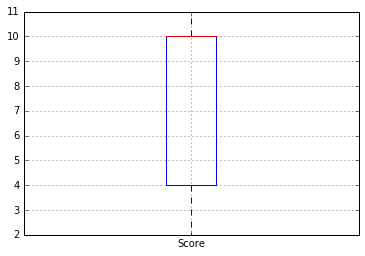

In [40]:
wine_df[['Score']].boxplot()
wine_df.Score.mean()

## Exercise 4: Feature Extraction

We would like to use a regression tree to predict the score of a wine. In order to do that, we first need to select and engineer appropriate features.

- Set the target to be the Score column, drop the rows with no score
- Use pd.get_dummies to create dummy features for all the text columns
- Fill the nan values in the numerical columns, using an appropriate method
- Train a Decision tree regressor on the Score, using a train test split:
        X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, random_state=42)
- Plot the test values, the predicted values and the residuals
- Calculate R^2 score
- Discuss your findings


In [41]:
dropped = wine_df[~wine_df['Score'].isnull()] #TODO use null or empty

In [42]:
y = dropped['Score']
#print y

In [43]:
numerical = ['Consumed In', 'Price', 'Vintage']
dummies = [c for c in dropped.columns if c not in numerical + ['Score']]

In [44]:
print dummies #columns that I will send to pd.dummies

[u'Color', u'Country', u'Grape', u'Name', u'Region', u'Vinyard']


In [45]:
X = dropped[numerical].join(pd.get_dummies(dropped[dummies]))

In [46]:
#list(X.columns)

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import make_pipeline

In [48]:
dt = make_pipeline(Imputer(),
                  #StandardScaler(),
                   DecisionTreeRegressor())

In [49]:
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size=0.3, 
                                                     random_state=42)
#Try without dummy variables 
X_train2, X_test2, y_train2, y_test2, = train_test_split(dropped[['Consumed In', 'Price', 'Vintage', 'Country']], y, test_size=0.3, 
                                                     random_state=42)

In [50]:
#tree_regress.fit(X_train, y_train)

dt.fit(X_train, y_train)
#dt.fit(X_train2, y_train2) #runs with error

Pipeline(steps=[('imputer', Imputer(axis=0, copy=True, missing_values='NaN', strategy='mean', verbose=0)), ('decisiontreeregressor', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'))])

In [51]:
y_pred = dt.predict(X_test)

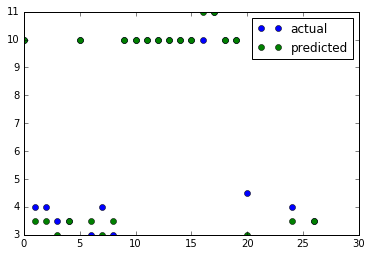

In [52]:
plt.plot(y_test.values, 'o')
plt.plot(y_pred, 'o')
plt.legend(['actual', 'predicted'])

-0.0925925925926


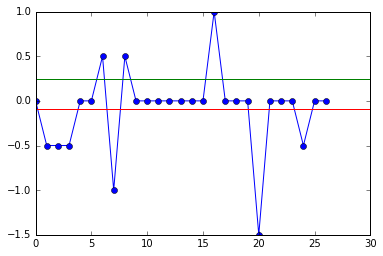

In [53]:
resid = y_pred - y_test.values
print resid.mean()
abs_resid = abs(resid).mean()
plt.plot(resid, 'o-')
plt.axhline(resid.mean(), color = 'r')
plt.axhline(abs_resid, color = 'g')

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2_score(y_test, y_pred)

0.97768113858539385

In [112]:
#!dot -Tpng tree.dot -o tree.png

# from sklearn.externals.six import StringIO
# from sklearn.tree import export_graphviz as gv
# import pydot

# dot_data = StringIO()
# with open("testing.dot", "w") as f:
#     gv(dt, out_file=f)

In [111]:
# from sklearn.tree import export_graphviz
# import graphviz

# export_graphviz(dt, out_file="mytree.dot")
# with open("mytree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)

> Discussion
The regression score is very bad and the predicted values do not seem to reproduce the expected values. This is probably due to 2 factors:
- too few data points to actually use machine learning
- features are probably not indicative of the score
Discuss with students here about the importance of not applying a ML model blindly.

## Exercise 5: IMDB Movies

Sometimes an API doesn't provide all the information we would like to get and we need to be creative.
Here we will use a combination of scraping and API calls to investigate the ratings and gross earnings of famous movies.

## 5.a Get top movies

The Internet Movie Database contains data about movies. Unfortunately it does not have a public API.

The page http://www.imdb.com/chart/top contains the list of the top 250 movies of all times. Retrieve the page using the requests library and then parse the html to obtain a list of the `movie_ids` for these movies. You can parse it with regular expression or using a library like `BeautifulSoup`.

**Hint:** movie_ids look like this: `tt2582802`

In [ ]:
def get_top_250():
    response = requests.get('http://www.imdb.com/chart/top')
    html = response.text
    entries = re.findall("<a href.*?/title/(.*?)/", html) #Wrong regex
    return list(set(entries))

In [ ]:
entries = get_top_250()

In [ ]:
len(entries)

In [ ]:
entries[0]

## 5.b Get top movies data

Although the Internet Movie Database does not have a public API, an open API exists at http://www.omdbapi.com.

Use this API to retrieve information about each of the 250 movies you have extracted in the previous step.
1. Check the documentation of omdbapi.com to learn how to request movie data by id
- Define a function that returns a python object with all the information for a given id
- Iterate on all the IDs and store the results in a list of such objects
- Create a Pandas Dataframe from the list

In [ ]:
def get_entry(entry):
    res = requests.get('http://www.omdbapi.com/?i='+entry)
    if res.status_code != 200:
        print entry, res.status_code
    else:
        print '.',
    try:
        j = json.loads(res.text)
    except ValueError:
        j = None
    return j

In [ ]:
entries_dict_list = [get_entry(e) for e in entries]

In [ ]:
len(entries_dict_list)

In [ ]:
df = pd.DataFrame(entries_dict_list)

In [ ]:
df.head(3)

In [ ]:
df.info()

## 5.c Get gross data

The OMDB API is great, but it does not provide information about Gross Revenue of the movie. We'll revert back to scraping for this.

1. Write a function that retrieves the gross revenue from the entry page at imdb.com
- The function should handle the exception of when the page doesn't report gross revenue
- Retrieve the gross revenue for each movie and store it in a separate dataframe

In [ ]:
def get_gross(entry):
    response = requests.get('http://www.imdb.com/title/'+entry)
    html = response.text
    try:
        gross_list = re.findall("Gross:</h4>[ ]*\$([^ ]*)", html)
        gross = int(gross_list[0].replace(',', ''))
        print '.',
        return gross
    except Exception as ex:
        print
        print ex, entry, response.status_code
        return None

In [ ]:
grosses = [(e, get_gross(e)) for e in entries]

In [ ]:
df1 = pd.DataFrame(grosses, columns=['imdbID', 'Gross'])
df1.head()

## 5.d Data munging

1. Now that you have movie information and gross revenue information, let's clean the two datasets.
- Check if there are null values. Be careful they may appear to be valid strings.
- Convert the columns to the appropriate formats. In particular handle:
    - Released
    - Runtime
    - year
    - imdbRating
    - imdbVotes
- Merge the data from the two datasets into a single one

In [ ]:
df = df.replace('N/A', np.nan)
df.info()

In [ ]:
df.Released = pd.to_datetime(df.Released)

In [ ]:
def intminutes(x):
    y = x.replace('min', '').strip()
    return int(y)

df.Runtime = df.Runtime.apply(intminutes)

In [ ]:
df.Year = df.Year.astype(int)

In [ ]:
df.imdbRating = df.imdbRating.astype(float)

In [ ]:
def intvotes(x):
    y = x.replace(',', '').strip()
    return int(y)
df.imdbVotes = df.imdbVotes.apply(intvotes)

In [ ]:
df.info()

In [ ]:
df = pd.merge(df, df1)

In [ ]:
df.head()

## 5.d Text vectorization

There are several columns in the data that contain a comma separated list of items, for example the Genre column and the Actors column. Let's transform those to binary columns using the count vectorizer from scikit learn.

Append these columns to the merged dataframe.

**Hint:** In order to get the actors name right, you'll have to modify the `token_pattern` in the `CountVectorizer`.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
cv = CountVectorizer()
data = cv.fit_transform(df.Genre).todense()
columns = ['genre_'+c for c in cv.get_feature_names()]
genredf = pd.DataFrame(data, columns=columns)
genredf.head()

In [ ]:
df = pd.concat([df, genredf], axis = 1)

In [ ]:
cv = CountVectorizer(token_pattern=u'(?u)\\w+\.?\\w?\.? \\w+')
data = cv.fit_transform(df.Actors).todense()
columns = ['actor: '+c for c in cv.get_feature_names()]
actorsdf = pd.DataFrame(data, columns=columns)
actorsdf.head()

In [ ]:
df.Actors[0]

In [ ]:
actorsdf.loc[0,actorsdf.iloc[0] != 0]

In [ ]:
df = pd.concat([df, actorsdf], axis = 1)

## Bonus:

1. What are the top 10 grossing movies?
- Who are the 10 actors that appear in the most movies?
- What's the average grossing of the movies in which each of these actors appear?
- What genre is the oldest movie?


In [ ]:
df.columns

In [ ]:
df[['Title','Gross', 'Genre']].sort_values('Gross', ascending = False).head(10)

In [ ]:
actorcols = actorsdf.columns

In [ ]:
topactors = actorsdf.sum().sort_values(ascending = False).head(10)
topactors

In [ ]:
means = [df.loc[df[actor]==1,'Gross'].mean() for actor in topactors.index]
means = pd.Series(means, index = topactors.index)
means.sort_values(ascending = False)

In [ ]:
df.sort_values('Released')[['Genre', 'Title', 'Released', 'Gross']].head()